In [73]:
import os
import sys

import seaborn as sns

sys.path.insert(0, '/home/djl34/lab_pd/kl/git/KL/scripts')
sys.path.insert(0, '/home/djl34/lab_pd/kl/git/KL/simulation')

# sys.path.append('../../Programs/KL/raklette/')
# sys.path.append('../../Programs/KL/scripts/')
# sys.path.append('../../Programs/KL/simulation/')

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

import raklette
import simulation_tools as simt
import ml_raklette as mlr

import importlib
importlib.reload(simt)
importlib.reload(mlr)

pd_data_dir = "/home/djl34/lab_pd/data"
KL_data_dir = "/home/djl34/lab_pd/kl/data"
scratch_dir = "/n/scratch/users/d/djl34/"

## January 30: get the expected LL for neutral, footprints, etc.

In [87]:
def get_expected_ll(mut_type, bin_num):
    df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/"+ mut_type + 
                                  "/pivot_bin_"+ str(bin_num)+".tsv"), sep = "\t")
    
    value_list = [str(x) for x in range(bin_num)]
    
    df = pd.melt(df, value_vars=value_list)

    df_neutral = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/neutral/pivot_bin_" 
                                          + str(bin_num)+".tsv"), sep = "\t")
    
    df_neutral = df_neutral.div(df_neutral.sum(axis=1), axis=0)

    df_neutral = pd.melt(df_neutral, value_vars=value_list)
    
    return sum(df["value"] * np.log10(df_neutral["value"]))/sum(df["value"])

def get_expected_ll_final_bin(mut_type, bin_num):
    df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/"+ mut_type + 
                                  "/pivot_bin_"+ str(bin_num)+".tsv"), sep = "\t")
    
    value_list = [str(x) for x in range(bin_num)]
    value_list = [str(0), str(bin_num - 1)]
    
    df = pd.melt(df, value_vars=value_list)

    df_neutral = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/neutral/pivot_bin_" 
                                          + str(bin_num)+".tsv"), sep = "\t")
    
    
    df_neutral = df_neutral[value_list]
    df_neutral = df_neutral.div(df_neutral.sum(axis=1), axis=0)

    df_neutral = pd.melt(df_neutral, value_vars=value_list)
    
    return sum(df["value"] * np.log10(df_neutral["value"]))/sum(df["value"])
    

    

In [64]:
types = ["neutral", "cds", "footprints", "non_footprint_dhs"]
# types = ["neutral", "cds", "footprints"]

In [65]:
list_of_list = []

for mut_type in types:
    for bin_num in [2, 9, 10]:
        expected_ll = get_expected_ll(mut_type, bin_num)
        
        list_of_list.append([mut_type, bin_num, expected_ll])

In [66]:
df_expected = pd.DataFrame(list_of_list, columns = ["mut_type", "bin_number", "expected_ll"])

In [68]:
def get_relative_ll(df_expected, bin_num , ll):
    
    ll_neutral = df_expected[(df_expected["mut_type"] == "neutral") & (df_expected["bin_number"] == bin_num)]["expected_ll"].iloc[0]
    
    return ll - ll_neutral

In [69]:
df_expected['relative_ll'] = df_expected.apply(lambda x: get_relative_ll(df_expected, x['bin_number'], x['expected_ll']), axis=1)

In [88]:
list_of_list = []

for mut_type in types:
    for bin_num in [2, 9, 10]:
        expected_ll = get_expected_ll_final_bin(mut_type, bin_num)
        
        list_of_list.append([mut_type, bin_num, expected_ll])

df_expected_final = pd.DataFrame(list_of_list, columns = ["mut_type", "bin_number", "expected_ll"])

def get_relative_ll(df_expected, bin_num , ll):
    
    ll_neutral = df_expected[(df_expected["mut_type"] == "neutral") & (df_expected["bin_number"] == bin_num)]["expected_ll"].iloc[0]
    
    return ll - ll_neutral

df_expected_final['relative_ll'] = df_expected_final.apply(lambda x: get_relative_ll(df_expected_final, x['bin_number'], x['expected_ll']), axis=1)

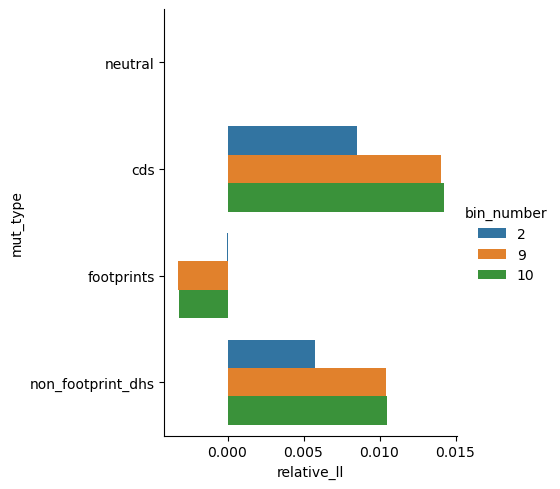

In [82]:
sns.catplot(data=df_expected, y="mut_type", x="relative_ll", hue="bin_number", kind="bar")


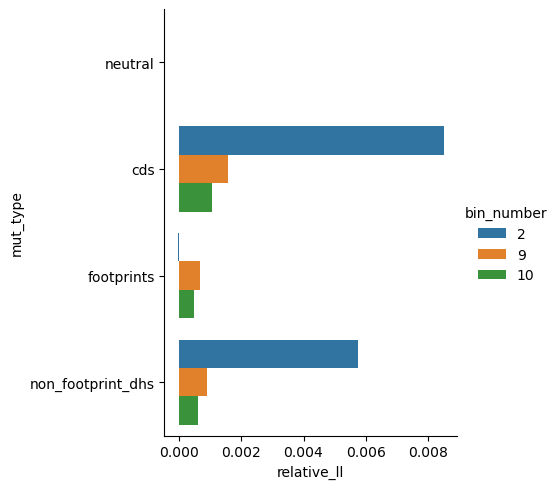

In [89]:
sns.catplot(data=df_expected_final, y="mut_type", x="relative_ll", hue="bin_number", kind="bar")


In [100]:
mut_type = "footprints"
bin_num = 9

df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/"+ mut_type + 
                              "/pivot_bin_"+ str(bin_num)+".tsv"), sep = "\t")

df = df.div(df.sum(axis=1), axis=0)

df.head()

,0,1,2,3,4,5,6,7,8
0,0.975298,0.013958,0.003420,0.002570,0.001719,0.001588,0.000899,0.000276,0.000272
1,0.961509,0.021408,0.005431,0.004093,0.002756,0.002537,0.001431,0.000444,0.000391
2,0.944296,0.030620,0.007961,0.006004,0.004050,0.003766,0.002134,0.000634,0.000536
3,0.926091,0.040284,0.010638,0.008072,0.005456,0.005051,0.002857,0.000847,0.000704
4,0.907500,0.050000,0.013458,0.010140,0.006897,0.006361,0.003631,0.001091,0.000922


In [96]:
df.tail()

,0,1,2,3,4,5,6,7,8
49,0.013808,0.027349,0.036504,0.085113,0.158715,0.339857,0.247233,0.059852,0.031570
50,0.011427,0.021766,0.032019,0.075564,0.152868,0.344756,0.264114,0.063175,0.034310
51,0.009082,0.018097,0.028275,0.069949,0.139674,0.338023,0.287961,0.071537,0.037402
52,0.007089,0.013765,0.020442,0.055556,0.120013,0.339268,0.317301,0.081273,0.045293
53,0.004279,0.010024,0.014425,0.042787,0.103912,0.324817,0.349511,0.098411,0.051834


In [97]:
mut_type = "non_footprint_dhs"
bin_num = 9

df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/"+ mut_type + 
                              "/pivot_bin_"+ str(bin_num)+".tsv"), sep = "\t")
df = df.div(df.sum(axis=1), axis=0)

df.head()

,0,1,2,3,4,5,6,7,8
0,0.975749,0.013715,0.003351,0.002510,0.001692,0.001552,0.000879,0.000277,0.000275
1,0.962205,0.021078,0.005314,0.003991,0.002692,0.002480,0.001407,0.000434,0.000400
2,0.945046,0.030323,0.007842,0.005885,0.003965,0.003679,0.002075,0.000639,0.000546
3,0.926790,0.040119,0.010522,0.007900,0.005332,0.004943,0.002803,0.000861,0.000731
4,0.908244,0.049853,0.013280,0.009982,0.006762,0.006267,0.003553,0.001099,0.000960


In [98]:
df.tail()

,0,1,2,3,4,5,6,7,8
49,0.015685,0.026369,0.035178,0.082101,0.155857,0.337915,0.251824,0.060957,0.034115
50,0.012328,0.021691,0.030172,0.074354,0.147703,0.342017,0.269525,0.065636,0.036574
51,0.009499,0.017838,0.025820,0.065275,0.136751,0.342580,0.288949,0.072730,0.040558
52,0.006522,0.013529,0.019724,0.052656,0.119505,0.336464,0.321705,0.082437,0.047458
53,0.003533,0.009216,0.013581,0.040899,0.100733,0.326739,0.355659,0.096840,0.052800


## January 29:  let's check if the expected log-likelihood is the same for all of the AF bins

In [2]:
# read pivot
#make offset
# read into file
# calculate log-likelihood

In [34]:
df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/neutral/pivot_bin_2.tsv"), sep = "\t")

data = np.array(df)

betas = raklette.multinomial_trans(df)

winsfs_test = mlr.WinSFS(data = data, mut_offset = betas)

print(winsfs_test.ll_expected())

winsfs_test.ml_optim( verbose = False)
print(winsfs_test.KL(4))
winsfs_test.ml_boostrap(verbose = False)
print(winsfs_test.KL(4))

0.6931471805599452
0.0
0.0


In [36]:
alpha_bs, fit_probs_bs = winsfs_test.ml_boostrap(verbose = False)

In [40]:
alpha_bs.shape

(100, 1)

In [39]:
fit_probs_bs.shape

(100, 54, 2)

In [31]:
df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/neutral/pivot_bin_9.tsv"), sep = "\t")

data = np.array(df)

betas = raklette.multinomial_trans(df)

winsfs_test = mlr.WinSFS(data = data, mut_offset = betas)

winsfs_test.ll_expected()

winsfs_test.ml_optim( verbose = False)
print(winsfs_test.KL(4))
winsfs_test.ml_boostrap(verbose = False)
print(winsfs_test.KL(4))

-2.0841207734821743e-17
-2.0841207734821743e-17


In [30]:
df = pd.read_csv(os.path.join(KL_data_dir, "results/method_validation/split/neutral/pivot_bin_10.tsv"), sep = "\t")

data = np.array(df)

betas = raklette.multinomial_trans(df)

winsfs_test = mlr.WinSFS(data = data, mut_offset = betas)

winsfs_test.ll_expected()

winsfs_test.ml_optim( verbose = False)
print(winsfs_test.KL(4))
winsfs_test.ml_boostrap(verbose = False)
print(winsfs_test.KL(4))

0.0
0.0
